## Решающие деревья

Это логический алгоритм классификации, решающий задачи классификации и регрессии. Данный алгоритм представляет собой объединение логических условий в структуру дерева.

В зависимости от пространственной структуры данных, один типов моделей из них будет работать лучше:

* Если данные хорошо линейно разделимы,  то линейная модель;
* Если данные линейно неразделимы (присутствуют только кусочно-линейные или нелинейные зависимости), то решающие деревья.


### План семинара:

1. [Задачи](#tasks)
2. [Дерево решений](#decisiontree)
3. [Переобучение](#overfitting)
4. [Неустойчивость](#unstable)
5. [Пример на датасете](#dataset)

### Задачи <a name="tasks"></a>


**Задача 1**. Постройте регрессионное дерево для прогнозирования $y$ с помощью $x$ на обучающей выборке:

||||||
|---|---|---|---|:---:|
|$x_i$|0|1|2|3|
|$y_i$|5|6|4|100|


Критерий деления узла на два — минимизация $RSS$. Дерево строится до трёх терминальных узлов.


**Задача 2**. Постройте регрессионное дерево для прогнозирования $y$ с помощью $x$ на обучающей выборке:

    
|$$y_{i}$$| $$x_{i}$$ |
|:---:|:---:|
|100|1|
|102|2|
|103|3|
|50|4|
|55|5|
|61|6|
|70|7|

Критерий деления узла на два — минимизация $RSS$. Узлы делятся до тех пор, пока в узле остаётся больше двух наблюдений.


**Задача 3**.

Дон-Жуан предпочитает брюнеток. Перед Новым Годом он посчитал, что в записной книжке у него 20 блондинок, 40 брюнеток, две рыжих и восемь шатенок. С Нового Года Дон-Жуан решил перенести все сведения в две записные книжки, в одну — брюнеток, во вторую — остальных.

Как изменились индекс Джини и энтропия в результате такого разбиения?



**Задача 4**.

Приведите примеры наборов данных, для которых индекс Джини равен $0$, $0.5$ и $0.999$.

**Задача 5**.

Машка пять дней подряд гадала на ромашке, а затем выкладывала очередную фотку «Машка с ромашкой» в инстаграмчик. Результат гадания — переменная $y_i$, количество лайков у фотки — переменная $x_i$. Постройте классификационное дерево для прогнозирования $y_i$ с помощью $x_i$ на обучающей выборке:

|$$y_{i}$$| $$x_{i}$$ |
|:---:|:---:|
|плюнет|10|
|поцелует|11|
|поцелует|12|
|к сердцу прижмет|13|
|к сердцу прижмет|14|

Дерево строится до идеальной классификации. Критерий деления узла на два — максимальное падение индекса Джини.

$$Gini = p_1(1-p_1)+p_2(1-p_2)+...=\frac27\cdot\frac57+\frac47\cdot\frac37+...=0.58$$

$$Gini_{left} = 0$$

$$Gini_{right} = \frac23\cdot\frac13 + ...=0.48$$

In [77]:
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import pandas as pd

plt.rcParams["figure.figsize"] = (11, 6.5)

## Задача №1

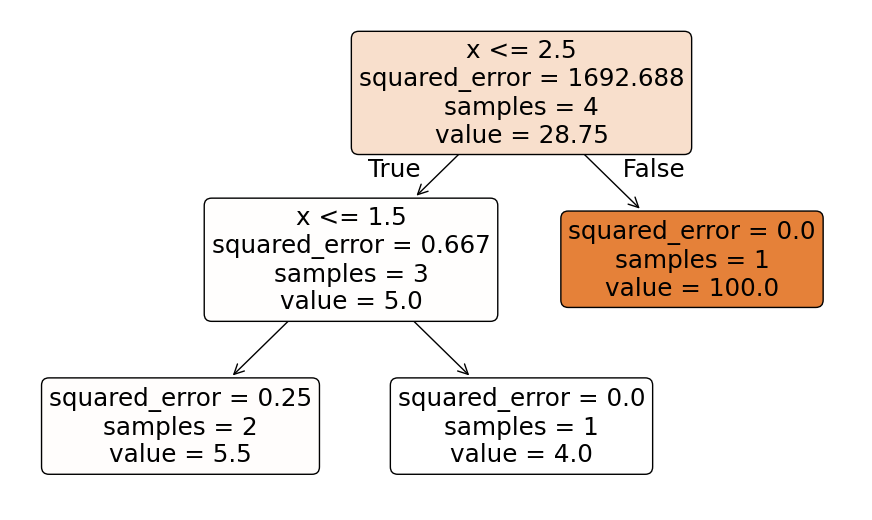

In [78]:
X = np.array([0, 1, 2, 3]).reshape(-1, 1)
y = np.array([5, 6, 4, 100])

regressor = DecisionTreeRegressor(max_leaf_nodes=3, criterion='squared_error')
regressor.fit(X, y)

plt.figure()
plot_tree(regressor, filled=True, feature_names=["x"], rounded=True)
plt.show()

## Задача №2

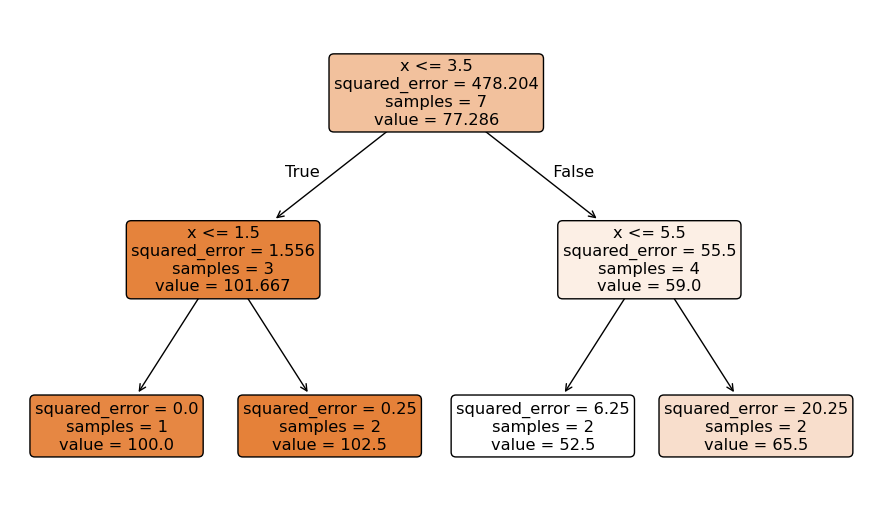

In [79]:
X = np.array([1, 2, 3, 4, 5, 6, 7]).reshape(-1, 1)
y = np.array([100, 102, 103, 50, 55, 61, 70])

regressor = DecisionTreeRegressor(min_samples_split=3, criterion='squared_error')
regressor.fit(X, y)

plt.figure()
plot_tree(regressor, filled=True, feature_names=["x"], rounded=True)
plt.show()

## Задача №3

In [80]:
import math


def gini_index(counts):
    total = sum(counts)
    return 1 - sum((count / total) ** 2 for count in counts)


def entropy(counts):
    total = sum(counts)
    ent = 0
    for count in counts:
        p = count / total
        if p > 0:
            ent -= p * math.log2(p)
    return ent


blondes = 20
brunettes = 40
redheads = 2
chestnuts = 8
counts_original = [blondes, brunettes, redheads, chestnuts]
first_book = [brunettes]
second_book = [blondes, redheads, chestnuts]

gini_brunettes = gini_index(first_book)
entropy_brunettes = entropy(first_book)
gini_others = gini_index(second_book)
entropy_others = entropy(second_book)

# Результаты
print(f"Исходный индекс Джини: {gini_index(counts_original):.4f}")
print(f"Исходная энтропия: {entropy(counts_original):.4f}")
print("\nПосле разбиения:")
print(f"Общий индекс Джини: {gini_brunettes + gini_others:.4f}")
print(f"Общая энтропия: {entropy_brunettes + entropy_others:.4f}")
print(f"Индекс Джини для книжки с брюнетками: {gini_brunettes:.4f}")
print(f"Энтропия для книжки с брюнетками: {entropy_brunettes:.4f}")
print(f"Индекс Джини для книжки с остальными: {gini_others:.4f}")
print(f"Энтропия для книжки с остальными: {entropy_others:.4f}")

Исходный индекс Джини: 0.5780
Исходная энтропия: 1.4819

После разбиения:
Общий индекс Джини: 0.4800
Общая энтропия: 1.1589
Индекс Джини для книжки с брюнетками: 0.0000
Энтропия для книжки с брюнетками: 0.0000
Индекс Джини для книжки с остальными: 0.4800
Энтропия для книжки с остальными: 1.1589


## Задача №4

Индекс Джини равен 0 — это полностью равномерное распределение (полное равенство): [1, 1, 1, 1]

Индекс Джини равен 0.5 — это умеренно неравномерное распределение: [1, 1, 2, 2, 3, 3]

Индекс Джини равен 0.999 — это крайне неравномерное распределение: [1, 1, 1, 1, 1, 1000]

## Задача №5

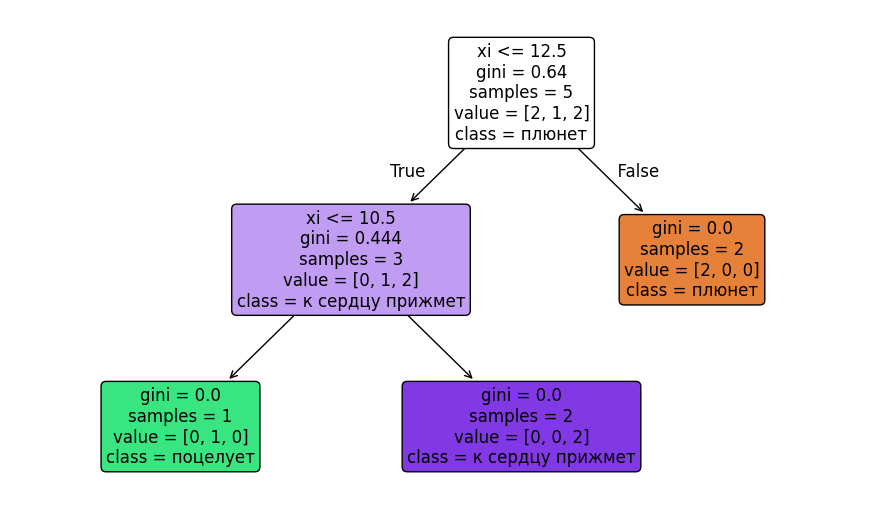

,xi,yi,predicted_yi
0,10,1,1
1,11,2,2
2,12,2,2
3,13,0,0
4,14,0,0


In [81]:
data = {
    'xi': [10, 11, 12, 13, 14],
    'yi': ['плюнет', 'поцелует', 'поцелует', 'к сердцу прижмет', 'к сердцу прижмет']
}

df = pd.DataFrame(data)
df['yi'] = df['yi'].astype('category').cat.codes

X = df[['xi']]
y = df['yi']

clf = DecisionTreeClassifier(criterion='gini', max_depth=None)
clf.fit(X, y)

plot_tree(clf, filled=True, feature_names=['xi'], class_names=['плюнет', 'поцелует', 'к сердцу прижмет'], rounded=True, fontsize=12)
plt.show()

predictions = clf.predict(X)
df['predicted_yi'] = predictions
df['predicted_yi'] = df['predicted_yi'].astype('category').cat.codes
df